# IMPORT LIBRARIES

In [1]:
import numpy as np 
import joblib
import tensorflow as tf
import pandas as pd
import keras
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import IsolationForest
from sklearn import svm
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

# -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- 

# READ DATASET 

In [3]:
data= pd.read_csv("MLasthma.csv")
data.head()

,asthma,cough,phlegm,wheeze,Dysp,CT,Exe,AR,BMI,GER,...,REm,Ecz,Hosp,Food,Cold,AP,Psmoke,Preg,Animal,Damp
0,1,5.0,0.5,3.0,2.0,1,1,3,0.0,0,...,1,1,1,1,2,0,2,0,0.0,0
1,0,0.0,0.0,0.0,0.0,0,1,2,0.0,1,...,0,0,0,0,2,0,0,0,0.0,0
2,1,5.0,0.0,1.0,1.0,0,1,3,0.0,0,...,0,1,0,0,1,0,2,0,0.0,0
3,1,4.0,0.0,1.0,0.0,0,1,3,0.0,1,...,1,1,0,1,1,0,1,0,0.0,0
4,1,5.0,0.0,2.0,2.0,0,1,3,0.0,1,...,1,0,0,1,1,0,0,0,0.0,0


# DATA DETAILS

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 25 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   asthma   254 non-null    int64  
 1   cough    254 non-null    float64
 2   phlegm   254 non-null    float64
 3   wheeze   254 non-null    float64
 4   Dysp     254 non-null    float64
 5   CT       254 non-null    int64  
 6   Exe      254 non-null    int64  
 7   AR       254 non-null    int64  
 8   BMI      252 non-null    float64
 9   GER      254 non-null    int64  
 10  par2     254 non-null    int64  
 11  par1     254 non-null    int64  
 12  rel      254 non-null    int64  
 13  RAL      254 non-null    int64  
 14  RIr      254 non-null    int64  
 15  REm      254 non-null    int64  
 16  Ecz      254 non-null    int64  
 17  Hosp     254 non-null    int64  
 18  Food     254 non-null    int64  
 19  Cold     254 non-null    int64  
 20  AP       254 non-null    int64  
 21  Psmoke   254 non

In [5]:
data.shape

(254, 25)

In [6]:
data.describe()

,asthma,cough,phlegm,wheeze,Dysp,CT,Exe,AR,BMI,GER,...,REm,Ecz,Hosp,Food,Cold,AP,Psmoke,Preg,Animal,Damp
count,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,252.000000,254.000000,...,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,252.000000,254.000000
mean,0.665354,3.204724,0.276575,0.877953,0.600394,0.161417,0.657480,1.976378,0.222222,0.236220,...,0.377953,0.448819,0.271654,0.488189,1.196850,0.629921,0.405512,0.027559,0.071429,0.255906
std,0.472798,1.530461,0.401372,0.870785,0.902762,0.368642,0.475489,0.985785,0.416567,0.425598,...,0.485833,0.498356,0.445690,0.500847,0.790651,0.483779,0.714702,0.164029,0.258052,0.437231
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.312500,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,3.500000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,4.500000,0.500000,1.500000,1.000000,0.000000,1.000000,3.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,5.000000,1.000000,3.000000,3.000000,1.000000,1.000000,3.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000


# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# DATA PREPROCESSING

## (1)Eliminate space in the columns name

In [7]:
data.columns = data.columns.str.strip()

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## (2)Check for null values and drop them

In [8]:
data.isnull().sum().sum()

4

In [9]:
df=data.dropna()

In [10]:
df.isnull().sum().sum()

0

In [11]:
df.shape

(250, 25)

# (4)Data Smoothing
 ## Detect and Remove Outliers

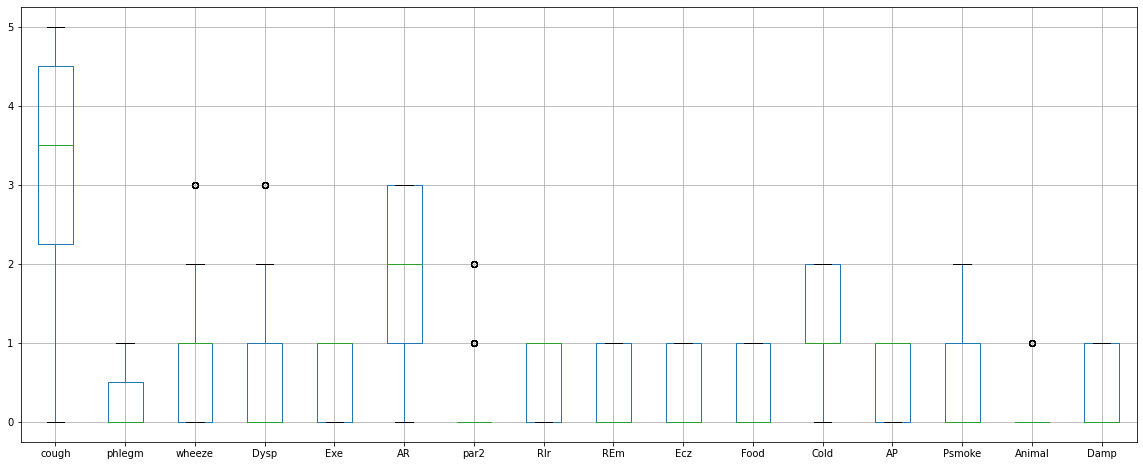

In [12]:
plt.figure(figsize = (20,8))
df.boxplot(column=['cough', 'phlegm', 'wheeze', 'Dysp',  'Exe', 'AR','par2',  'RIr', 'REm', 'Ecz', 'Food', 'Cold', 'AP', 'Psmoke','Animal', 'Damp'])
plt.show()

In [13]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(max_samples=100, random_state=4, contamination=.1)
#identify outliers:
y_pred_train = clf.fit_predict(df)

#Remove outliers where 1 represent inliers and -1 represent outliers:
df_cleaned = df[np.where(y_pred_train == 1, True, False)]


In [14]:
df.shape

(250, 25)

In [15]:
df_cleaned.shape

(225, 25)

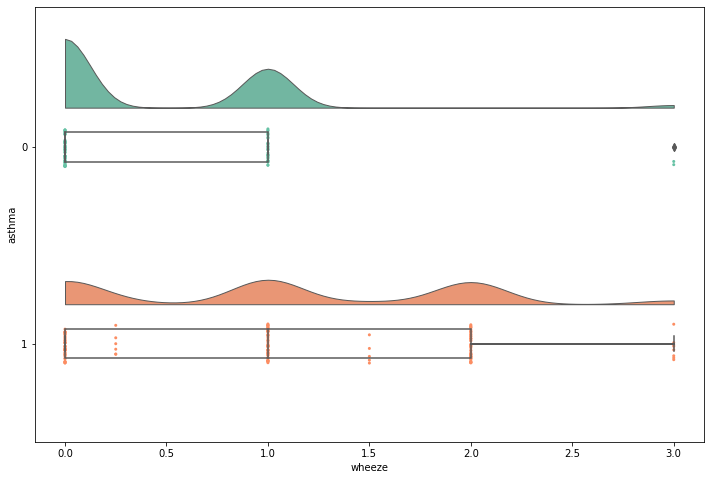

In [16]:
import ptitprince
plt.figure(figsize = (12,8))
ptitprince.RainCloud(data = df, x = 'asthma', y = 'wheeze', orient = 'h')
plt.show()

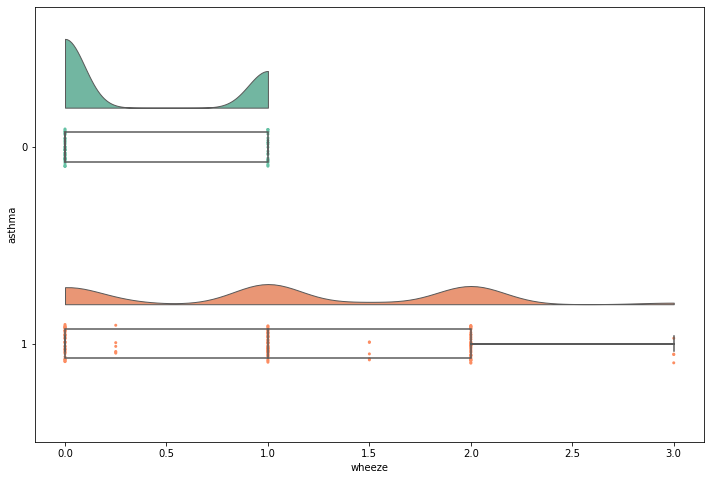

In [17]:
import ptitprince
plt.figure(figsize = (12,8))
ptitprince.RainCloud(data = df_cleaned, x = 'asthma', y = 'wheeze', orient = 'h')
plt.show()

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## (3)Feature Selection

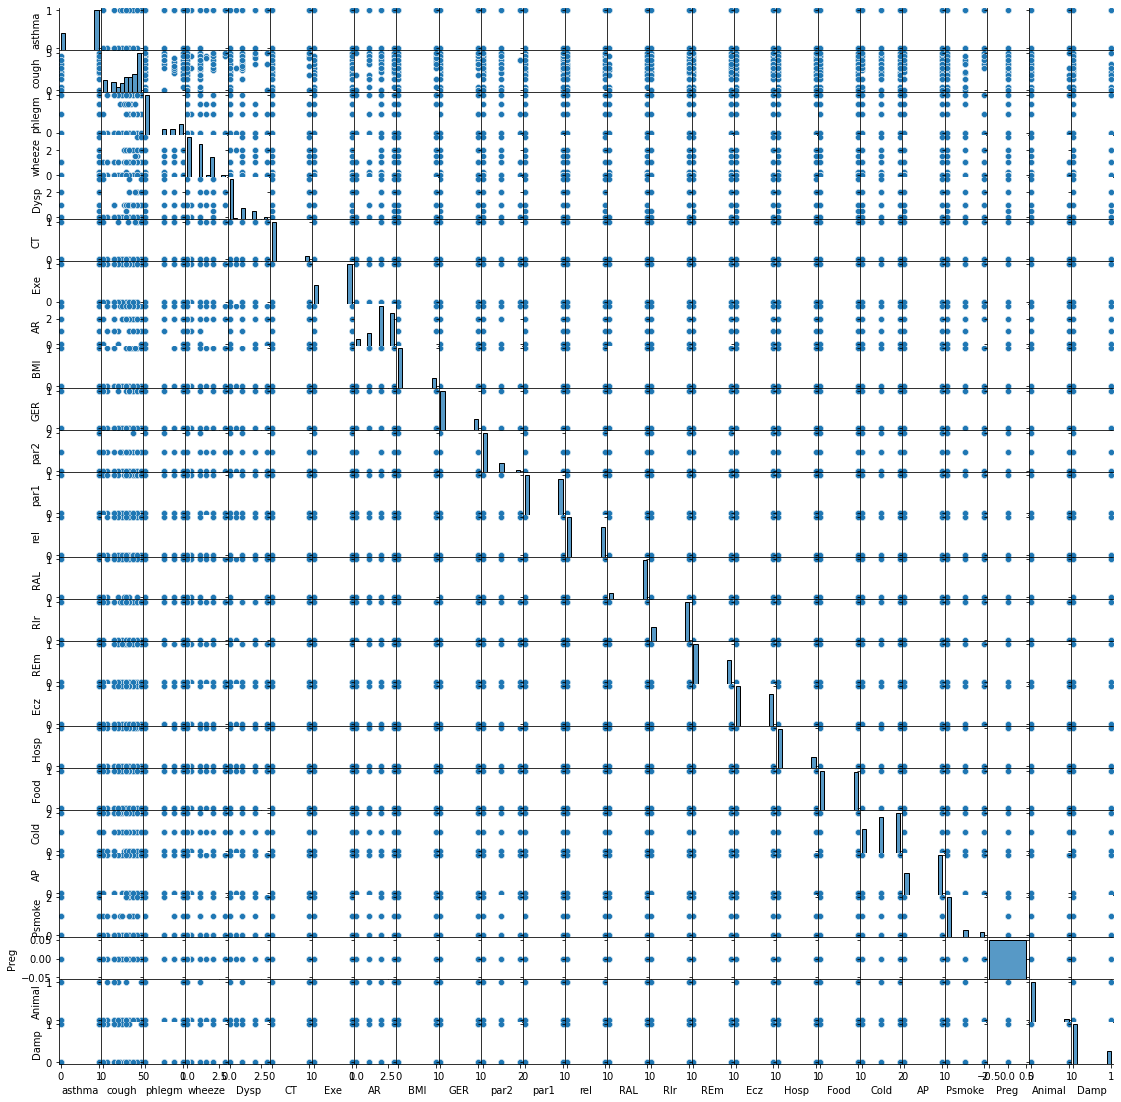

In [18]:
g=sns.pairplot(data = df_cleaned, height = 8) #
g.fig.set_size_inches(15,15)#


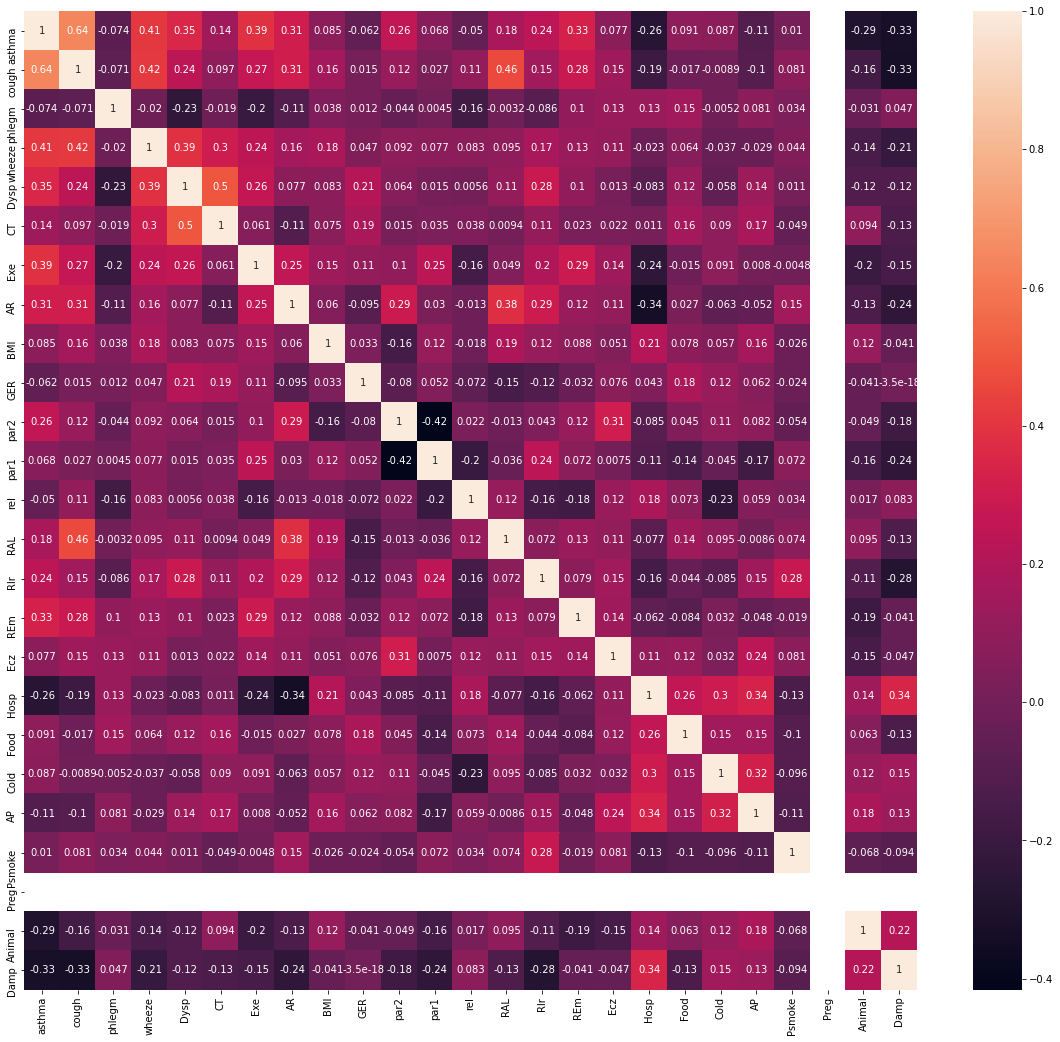

In [19]:
corr_matrix = df_cleaned.corr()
f, ax = plt.subplots(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [20]:
df_cleaned.corr()['asthma'].sort_values(ascending=False)

asthma    1.000000
cough     0.642604
wheeze    0.408831
Exe       0.390935
Dysp      0.349110
REm       0.328675
AR        0.309485
par2      0.255108
RIr       0.239005
RAL       0.175660
CT        0.143126
Food      0.091268
Cold      0.086569
BMI       0.084893
Ecz       0.076998
par1      0.067712
Psmoke    0.010470
rel      -0.049889
GER      -0.061824
phlegm   -0.074360
AP       -0.111418
Hosp     -0.261526
Animal   -0.289721
Damp     -0.325888
Preg           NaN
Name: asthma, dtype: float64

In [21]:
Features=df_cleaned.drop(['asthma'],axis=1)
Target=df_cleaned["asthma"]

In [22]:
bestfeatures = SelectKBest(score_func=chi2, k=24)
fit = bestfeatures.fit(Features,Target)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Features.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  # Naming the dataframe columns

# Print the 10 best features
print(featureScores.nlargest(24,'Score'))

   Features      Score
0     cough  59.844938
3      Dysp  35.254473
2    wheeze  29.433404
23     Damp  18.160674
22   Animal  17.794958
9      par2  15.412813
14      REm  15.339848
16     Hosp  11.900846
5       Exe  11.003787
6        AR   8.016472
4        CT   4.096990
13      RIr   3.370291
7       BMI   1.304424
19       AP   0.993109
17     Food   0.957928
12      RAL   0.894837
18     Cold   0.893092
15      Ecz   0.735157
1    phlegm   0.716123
8       GER   0.668896
10     par1   0.545600
11      rel   0.321070
20   Psmoke   0.030552


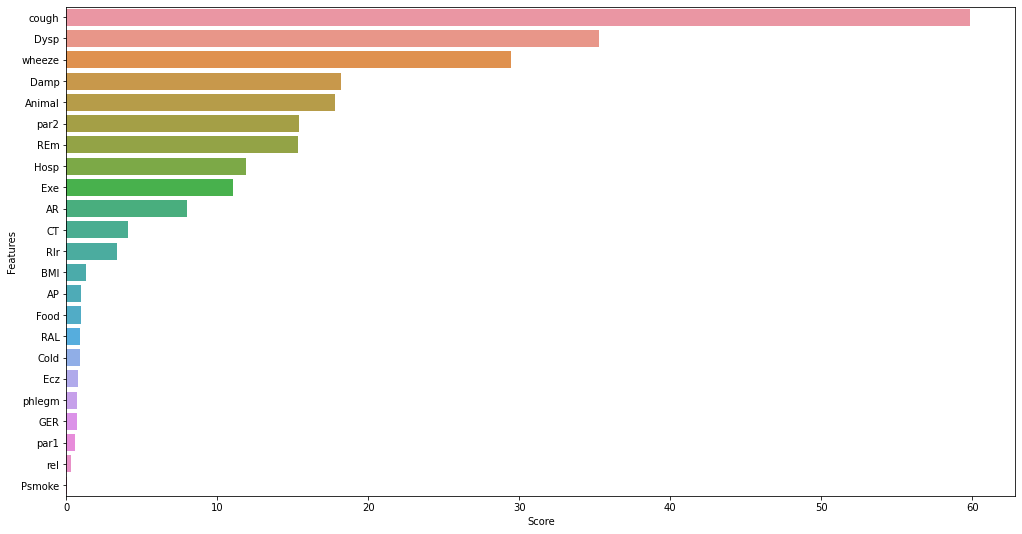

In [23]:
plt.figure(figsize=(17,9))
sns.barplot(x="Score", y="Features", data = featureScores.nlargest(24, 'Score'))
plt.show()

In [24]:
df_cleaned=df.drop(['Hosp','Preg','rel','par1','GER','BMI','RAL','CT'],axis=1)

In [25]:
df_cleaned.shape

(250, 17)

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## (5)Check Data Balance

In [26]:
print(df_cleaned.groupby('asthma').size())

asthma
0     85
1    165
dtype: int64


<AxesSubplot:xlabel='asthma', ylabel='count'>

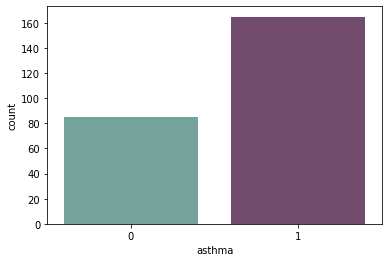

In [27]:
cols=["#6daa9f","#774571"]
sns.countplot(x=df_cleaned["asthma"],palette=cols)

In [28]:
print(df_cleaned.groupby('asthma').size())

asthma
0     85
1    165
dtype: int64


<AxesSubplot:xlabel='asthma', ylabel='count'>

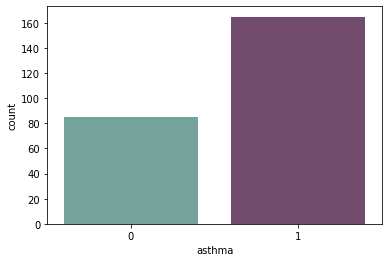

In [29]:
cols=["#6daa9f","#774571"]
sns.countplot(x=df_cleaned["asthma"],palette=cols)

#### As shown in the previous figure the number of patients having asthma(1) are almost the double of not having(0)

# Data Splitting

In [30]:
X=df_cleaned.drop(['asthma'],axis=1)
Y=df_cleaned["asthma"]

In [31]:
X.shape

(250, 16)

In [32]:
Y.shape

(250,)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

## (6)Balance Data using SMOTE

In [34]:
sm = SMOTE(random_state=2)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train.ravel())


In [35]:
X_train.shape

(175, 16)

In [36]:
X_train_res.shape

(222, 16)

In [37]:
Y_train.shape

(175,)

In [38]:
Y_train_res.shape

(222,)

In [39]:
Y_test.shape

(75,)

#### Before data Resampling

<AxesSubplot:xlabel='asthma', ylabel='count'>

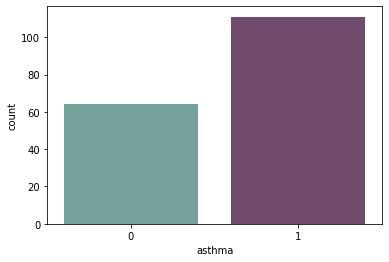

In [40]:
cols=["#6daa9f","#774571"]
sns.countplot(x=Y_train,palette=cols)

#### After data Resampling

<AxesSubplot:ylabel='count'>

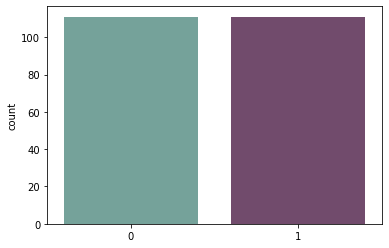

In [41]:
cols=["#6daa9f","#774571"]
sns.countplot(x=Y_train_res,palette=cols)

# ------------------------------------------------------------------------------------------------------------

In [42]:
print(df_cleaned.groupby(Y_test).size())

asthma
0.0    21
1.0    54
dtype: int64


<AxesSubplot:xlabel='asthma', ylabel='count'>

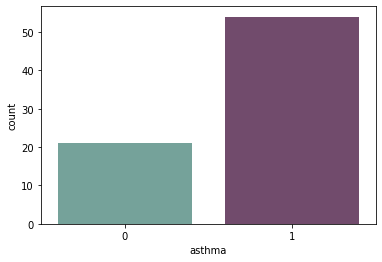

In [43]:
cols=["#6daa9f","#774571"]
sns.countplot(x=Y_test,palette=cols)

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------           

# PREDICTION MODELS

# (1)Logistic Regression Model

In [44]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
LRclf = LogisticRegression()
LRclf.fit(X_train_res, Y_train_res)
LR_pred = LRclf.predict(X_test)



In [45]:
print("Accuracy of logistic regression Model::",accuracy_score(Y_test,LR_pred)*100,'%')
print("Balanced Accuracy of logistic regression Model::",balanced_accuracy_score(Y_test,LR_pred)*100,'%')
print("Sensitivity of logistic regression Model::",recall_score(Y_test,LR_pred)*100,'%')
print("Specifity of logistic regression Model::",recall_score(Y_test,LR_pred, pos_label=0)*100,'%')
print("F1score of logistic regression Model::",f1_score(Y_test,LR_pred)*100,'%')


Accuracy of logistic regression Model:: 89.33333333333333 %
Balanced Accuracy of logistic regression Model:: 88.22751322751323 %
Sensitivity of logistic regression Model:: 90.74074074074075 %
Specifity of logistic regression Model:: 85.71428571428571 %
F1score of logistic regression Model:: 92.45283018867924 %


In [46]:
Variance=np.var(LR_pred)
print('Variance=',Variance,'  ---------------->indicator for overfitting ')
SSE=np.mean((np.mean(LR_pred)-Y)**2)
Bias=SSE-Variance
print('Bias=',Bias,'  -------------------->indicator for underfitting ')

Variance= 0.2126222222222222   ---------------->indicator for overfitting 
Bias= 0.012888888888889005   -------------------->indicator for underfitting 


<Figure size 504x360 with 0 Axes>

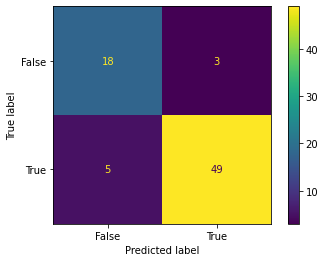

In [47]:
from sklearn import metrics
conf_matrix = confusion_matrix(Y_test, LR_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])
%matplotlib inline
plt.figure(figsize=(7,5))
#sns.heatmap(cm_display, annot=True)
cm_display.plot()
plt.show()

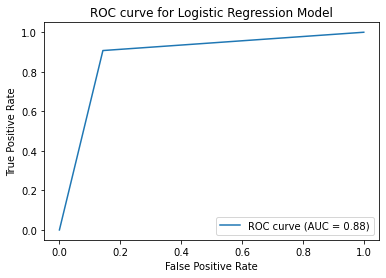

In [48]:
from sklearn.metrics import roc_curve, roc_auc_score
# Calculate the false positive rate and true positive rate for different probability thresholds
fpr, tpr, thresholds = roc_curve(Y_test,LR_pred)

# Calculate the AUC score
auc = roc_auc_score(Y_test,LR_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Logistic Regression Model')
plt.legend()
plt.show()

In [49]:
results = pd.DataFrame({'Actual': Y_test, 'Predicted': LR_pred})
print(results)

     Actual  Predicted
146       0          0
6         1          1
99        1          1
62        1          1
115       0          0
..      ...        ...
75        1          1
162       1          0
118       1          1
77        1          1
241       0          0

[75 rows x 2 columns]


# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# (2)Random Forest Model

In [50]:
from sklearn.ensemble import RandomForestClassifier
RFclf = RandomForestClassifier(n_estimators=100, random_state=42)
RFclf.fit(X_train_res, Y_train_res)
RFpredictions = RFclf.predict(X_test)


In [51]:
print("Accuracy of Random forest Model::",accuracy_score(Y_test,RFpredictions)*100,'%')
print("Balanced Accuracy of Random forest Model::",balanced_accuracy_score(Y_test,RFpredictions)*100,'%')
print("Sensitivity of Random forest Model::",recall_score(Y_test,RFpredictions)*100,'%')
print("Specifity of Random forest Model::",recall_score(Y_test,RFpredictions, pos_label=0)*100,'%')
print("F1score of Random forest Model::",f1_score(Y_test,RFpredictions)*100,'%')

Accuracy of Random forest Model:: 97.33333333333334 %
Balanced Accuracy of Random forest Model:: 95.23809523809523 %
Sensitivity of Random forest Model:: 100.0 %
Specifity of Random forest Model:: 90.47619047619048 %
F1score of Random forest Model:: 98.18181818181819 %


In [52]:
Variance=np.var(RFpredictions)
print('Variance=',Variance,'  ---------------->indicator for overfitting ')
SSE=np.mean((np.mean(RFpredictions)-Y)**2)
Bias=SSE-Variance
print('Bias=',Bias,'  -------------------->indicator for underfitting ')

Variance= 0.18915555555555552   ---------------->indicator for overfitting 
Bias= 0.042755555555556324   -------------------->indicator for underfitting 


<Figure size 504x360 with 0 Axes>

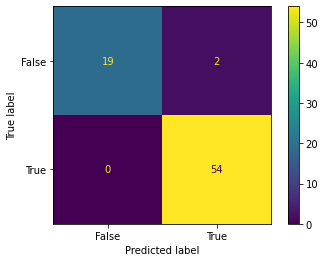

In [53]:
conf_matrix = confusion_matrix(Y_test, RFpredictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])
%matplotlib inline
plt.figure(figsize=(7,5))
#sns.heatmap(cm_display, annot=True)
cm_display.plot()
plt.show()

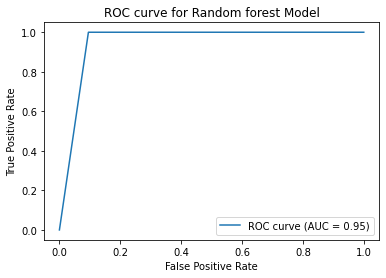

In [54]:
fpr, tpr, thresholds = roc_curve(Y_test,RFpredictions)

# Calculate the AUC score
auc = roc_auc_score(Y_test,RFpredictions)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Random forest Model')
plt.legend()
plt.show()

In [55]:
results = pd.DataFrame({'Actual': Y_test, 'Predicted': RFpredictions})
print(results)

     Actual  Predicted
146       0          0
6         1          1
99        1          1
62        1          1
115       0          0
..      ...        ...
75        1          1
162       1          1
118       1          1
77        1          1
241       0          0

[75 rows x 2 columns]


# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# (3)XGBOOST Model

In [56]:
import xgboost as xgb
XGBclf = xgb.XGBClassifier()
XGBclf.fit(X_train_res, Y_train_res)
XGB_pred = XGBclf.predict(X_test)

In [57]:
print("Accuracy of XGBOOST Model::",accuracy_score(Y_test,XGB_pred)*100,'%')
print("Balanced Accuracy of XGBOOST Model::",balanced_accuracy_score(Y_test,XGB_pred)*100,'%')
print("Sensitivity of XGBOOST Model::",recall_score(Y_test,XGB_pred)*100,'%')
print("Specifity of XGBOOST Model::",recall_score(Y_test,XGB_pred, pos_label=0)*100,'%')
print("F1score of XGBOOST Model::",f1_score(Y_test,XGB_pred)*100,'%')

Accuracy of XGBOOST Model:: 94.66666666666667 %
Balanced Accuracy of XGBOOST Model:: 93.38624338624338 %
Sensitivity of XGBOOST Model:: 96.29629629629629 %
Specifity of XGBOOST Model:: 90.47619047619048 %
F1score of XGBOOST Model:: 96.29629629629629 %


In [58]:
Variance=np.var(XGB_pred)
print('Variance=',Variance,'  ---------------->indicator for overfitting ')
SSE=np.mean((np.mean(XGB_pred)-Y)**2)
Bias=SSE-Variance
print('Bias=',Bias,'  -------------------->indicator for underfitting ')

Variance= 0.2016   ---------------->indicator for overfitting 
Bias= 0.026400000000000146   -------------------->indicator for underfitting 


<Figure size 504x360 with 0 Axes>

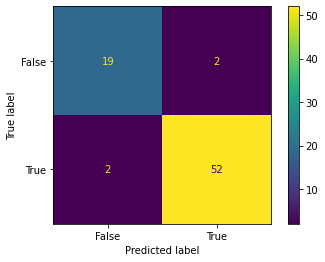

In [59]:
conf_matrix = confusion_matrix(Y_test, XGB_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])
%matplotlib inline
plt.figure(figsize=(7,5))
#sns.heatmap(cm_display, annot=True)
cm_display.plot()
plt.show()

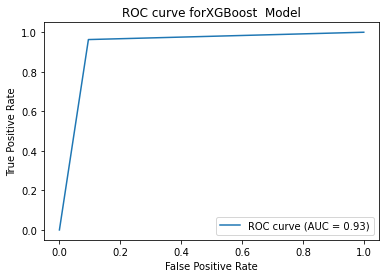

In [60]:
fpr, tpr, thresholds = roc_curve(Y_test,XGB_pred)

# Calculate the AUC score
auc = roc_auc_score(Y_test,XGB_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve forXGBoost  Model')
plt.legend()
plt.show()

In [61]:
results = pd.DataFrame({'Actual': Y_test, 'Predicted': XGB_pred})
print(results)

     Actual  Predicted
146       0          0
6         1          1
99        1          1
62        1          1
115       0          0
..      ...        ...
75        1          1
162       1          1
118       1          1
77        1          1
241       0          0

[75 rows x 2 columns]


# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# (4)Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier
DTclf = DecisionTreeClassifier()
DTclf.fit(X_train_res,Y_train_res)
DT_pred = DTclf.predict(X_test)


In [63]:
print("Accuracy of Decision Tree Model::",accuracy_score(Y_test,DT_pred)*100,'%')
print("Balanced Accuracy of Decision Tree Model::",balanced_accuracy_score(Y_test,DT_pred)*100,'%')
print("Sensitivity of Decision Tree Model::",recall_score(Y_test,DT_pred)*100,'%')
print("Specifity of Decision Tree Model::",recall_score(Y_test,DT_pred, pos_label=0)*100,'%')
print("F1score of Decision Tree Model::",f1_score(Y_test,DT_pred)*100,'%')

Accuracy of Decision Tree Model:: 97.33333333333334 %
Balanced Accuracy of Decision Tree Model:: 98.14814814814814 %
Sensitivity of Decision Tree Model:: 96.29629629629629 %
Specifity of Decision Tree Model:: 100.0 %
F1score of Decision Tree Model:: 98.11320754716981 %


In [64]:
Variance=np.var(DT_pred)
print('Variance=',Variance,'  ---------------->indicator for overfitting ')
SSE=np.mean((np.mean(DT_pred)-Y)**2)
Bias=SSE-Variance
print('Bias=',Bias,'  -------------------->indicator for underfitting ')

Variance= 0.2126222222222222   ---------------->indicator for overfitting 
Bias= 0.012888888888889005   -------------------->indicator for underfitting 


<Figure size 504x360 with 0 Axes>

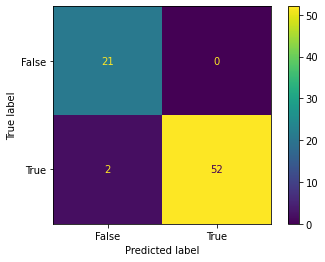

In [65]:
conf_matrix = confusion_matrix(Y_test, DT_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])
%matplotlib inline
plt.figure(figsize=(7,5))
#sns.heatmap(cm_display, annot=True)
cm_display.plot()
plt.show()

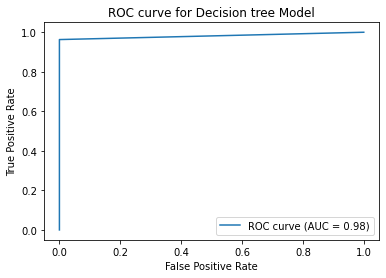

In [66]:
fpr, tpr, thresholds = roc_curve(Y_test,DT_pred)

# Calculate the AUC score
auc = roc_auc_score(Y_test,DT_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Decision tree Model')
plt.legend()
plt.show()

In [67]:
results = pd.DataFrame({'Actual': Y_test, 'Predicted': DT_pred})
print(results)

     Actual  Predicted
146       0          0
6         1          1
99        1          1
62        1          1
115       0          0
..      ...        ...
75        1          1
162       1          1
118       1          1
77        1          1
241       0          0

[75 rows x 2 columns]


# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# (5)Support vector machine

In [68]:
from sklearn.svm import SVC
SVMclf = SVC(kernel='linear')
SVMclf.fit(X_train_res, Y_train_res)
SVM_pred = SVMclf.predict(X_test)

In [69]:
print("Accuracy of SVM Model::",accuracy_score(Y_test,SVM_pred)*100,'%')
print("Balanced Accuracy of SVM Model::",balanced_accuracy_score(Y_test,SVM_pred)*100,'%')
print("Sensitivity of SVM Model::",recall_score(Y_test,SVM_pred)*100,'%')
print("Specifity of SVM Model::",recall_score(Y_test,SVM_pred, pos_label=0)*100,'%')
print("F1score SVM Model::",f1_score(Y_test,SVM_pred)*100,'%')

Accuracy of SVM Model:: 92.0 %
Balanced Accuracy of SVM Model:: 91.53439153439153 %
Sensitivity of SVM Model:: 92.5925925925926 %
Specifity of SVM Model:: 90.47619047619048 %
F1score SVM Model:: 94.33962264150944 %


In [70]:
Variance=np.var(SVM_pred)
print('Variance=',Variance,'  ---------------->indicator for overfitting ')
SSE=np.mean((np.mean(SVM_pred)-Y)**2)
Bias=SSE-Variance
print('Bias=',Bias,'  -------------------->indicator for underfitting ')

Variance= 0.2126222222222222   ---------------->indicator for overfitting 
Bias= 0.012888888888889005   -------------------->indicator for underfitting 


<Figure size 504x360 with 0 Axes>

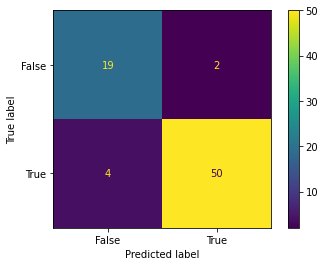

In [71]:
conf_matrix = confusion_matrix(Y_test, SVM_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])
%matplotlib inline
plt.figure(figsize=(7,5))
#sns.heatmap(cm_display, annot=True)
cm_display.plot()
plt.show()

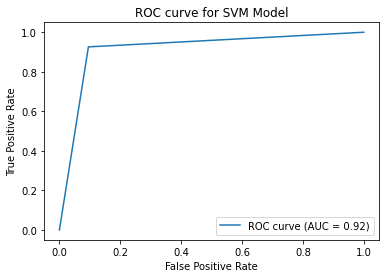

In [72]:
fpr, tpr, thresholds = roc_curve(Y_test,SVM_pred)

# Calculate the AUC score
auc = roc_auc_score(Y_test,SVM_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for SVM Model')
plt.legend()
plt.show()

In [73]:
results = pd.DataFrame({'Actual': Y_test, 'Predicted': SVM_pred})
print(results)

     Actual  Predicted
146       0          0
6         1          1
99        1          1
62        1          1
115       0          0
..      ...        ...
75        1          1
162       1          0
118       1          1
77        1          1
241       0          0

[75 rows x 2 columns]


# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# (6)KNN

In [74]:
from sklearn.neighbors import KNeighborsClassifier
knnclf =  KNeighborsClassifier(n_neighbors=2)#hyperparameter tunning
knnclf.fit(X_train_res, Y_train_res)
knn_pred = knnclf.predict(X_test)

In [75]:
print("Accuracy of KNN Model::",accuracy_score(Y_test,knn_pred)*100,'%')
print("Balanced Accuracy of KNN Model::",balanced_accuracy_score(Y_test,knn_pred)*100,'%')
print("Sensitivity of KNN Model::",recall_score(Y_test,knn_pred)*100,'%')
print("Specifity of KNN Model::",recall_score(Y_test,knn_pred, pos_label=0)*100,'%')
print("F1score KNN Model::",f1_score(Y_test,knn_pred)*100,'%')

Accuracy of KNN Model:: 92.0 %
Balanced Accuracy of KNN Model:: 91.53439153439153 %
Sensitivity of KNN Model:: 92.5925925925926 %
Specifity of KNN Model:: 90.47619047619048 %
F1score KNN Model:: 94.33962264150944 %


In [76]:
Variance=np.var(knn_pred)
print('Variance=',Variance,'  ---------------->indicator for overfitting ')
SSE=np.mean((np.mean(knn_pred)-Y)**2)
Bias=SSE-Variance
print('Bias=',Bias,'  -------------------->indicator for underfitting ')

Variance= 0.2126222222222222   ---------------->indicator for overfitting 
Bias= 0.012888888888889005   -------------------->indicator for underfitting 


<Figure size 504x360 with 0 Axes>

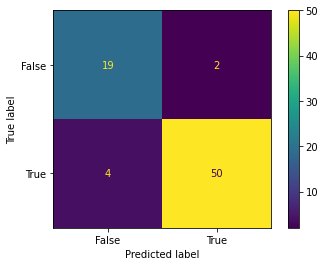

In [77]:
conf_matrix = confusion_matrix(Y_test, knn_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])
%matplotlib inline
plt.figure(figsize=(7,5))
#sns.heatmap(cm_display, annot=True)
cm_display.plot()
plt.show()

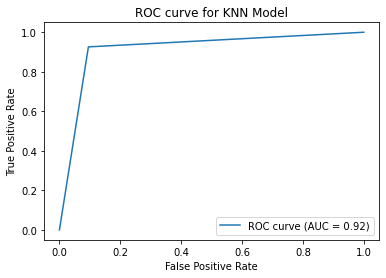

In [78]:
fpr, tpr, thresholds = roc_curve(Y_test,knn_pred)

# Calculate the AUC score
auc = roc_auc_score(Y_test,knn_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for KNN Model')
plt.legend()
plt.show()

In [79]:
results = pd.DataFrame({'Actual': Y_test, 'Predicted': knn_pred})
print(results)

     Actual  Predicted
146       0          0
6         1          1
99        1          1
62        1          1
115       0          0
..      ...        ...
75        1          1
162       1          1
118       1          1
77        1          1
241       0          0

[75 rows x 2 columns]


In [80]:
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(n_splits=5)
score=cross_val_score(DTclf,X,Y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [1. 1. 1. 1. 1.]
Average Cross Validation score :1.0


In [81]:
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(n_splits=5)
score=cross_val_score(RFclf,X,Y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [1. 1. 1. 1. 1.]
Average Cross Validation score :1.0


In [82]:
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(n_splits=5)
score=cross_val_score(XGBclf,X,Y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [1. 1. 1. 1. 1.]
Average Cross Validation score :1.0


In [83]:
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(n_splits=5)
score=cross_val_score(knnclf,X,Y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.98 0.98 0.98 0.98 1.  ]
Average Cross Validation score :0.984


In [84]:
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(n_splits=5)
score=cross_val_score(SVMclf,X,Y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [1.   0.88 1.   0.88 0.92]
Average Cross Validation score :0.9359999999999999


In [85]:
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(n_splits=5)
score=cross_val_score(LRclf,X,Y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.94 0.84 0.94 0.88 0.86]
Average Cross Validation score :0.892


# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Save Model

In [86]:
import joblib
joblib.dump(RFclf,'RFclf.joblib')


['RFclf.joblib']